In [1]:
# Import the dependencies.
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-13.62218449279733 -146.3653591386718
-46.90664888971044 177.48531258552367
0.6975647218525438 -47.957389376085956
-75.00420680173511 -55.88046620554498
60.93540334434985 103.76588618786184
85.34720866290664 0.7603559957509844
-24.76226832111506 69.20966846878221
-27.72510414685118 -41.64764179287607
69.13743391945027 161.25769040585732
-31.04855234414127 116.95854393935792
5.163416241844985 -111.72257813061867
-89.75827425344318 174.0972591809608
89.03648136870794 -176.79286498323955
56.40072747399611 -133.13257751082853
4.362958388263962 62.797958261185954
50.60889956693791 -59.486530131280574
73.8874992257339 102.18003933918868
-76.02249772089094 -104.67434176963201
-47.307285610831315 -110.51650445036891
-76.35888598515777 50.614337632231866
1.8949061527303144 -92.00885876875036
-61.35992590844563 154.22378177190944
31.22854517137543 48.40859629198019
-11.483850136053348 117.3145268299595
22.09750339069305 112.46962023296425
-48.7166927269126 -132.26027444594476
56.90482949788688 4

68.72206989034152 155.28352023941767
-5.724119504825637 -155.00172922490856
62.17680045457135 17.32867064492868
6.807580821131978 -50.854702172088224
-31.367190242895873 -64.89499980668856
9.754544324034313 -17.22161777984772
-36.35494148807455 152.70591811720453
22.470363168414607 7.665980252092311
44.13565393970512 95.2848285291318
27.259877992781426 151.0548148238102
67.92025727814158 121.91008161807429
68.43219737536174 28.436546228363426
65.83448775628315 -90.14436130012704
-88.51347750245093 -148.32725133994157
18.612309556434155 -108.75981163715204
56.98770935142409 16.89715163581357
-14.88369877567402 12.071978931793609
-48.46653567638613 129.25704822337156
-86.07278105047246 -84.87513615171889
23.995638411413637 62.28446053235433
27.56786377208762 175.07445520074072
-39.6653124344449 -156.02805190629977
-73.18555845796647 9.678984413574142
22.00504202032421 1.9852823900615988
-29.84650835643211 162.47256625050716
-72.44961679823894 20.23133350573326
71.60722138903662 -65.34683

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will ass it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficent count.
len(cities)

632

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bfb185c01e314a2d00457cc8ae85f7bb


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiarei
Processing Record 2 of Set 1 | waipawa
Processing Record 3 of Set 1 | curuca
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | vanavara
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | northam
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | ketchikan
Processing Record 15 of Set 1 | mahibadhoo
Processing Record 16 of Set 1 | saint-augustin
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | puerto ayora

Processing Record 42 of Set 4 | havoysund
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | pauini
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | peterhead
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | catamarca
Processing Record 49 of Set 4 | the valley
Processing Record 50 of Set 4 | bredasdorp
Processing Record 1 of Set 5 | hendijan
City not found. Skipping...
Processing Record 2 of Set 5 | mrirt
City not found. Skipping...
Processing Record 3 of Set 5 | samusu
City not found. Skipping...
Processing Record 4 of Set 5 | balaipungut
Processing Record 5 of Set 5 | sompeta
Processing Record 6 of Set 5 | nirgua
Processing Record 7 of Set 5 | yabrud
Processing Record 8 of Set 5 | qaqortoq
Processing Record 9 of Set 5 | luocheng
Processing Record 10 of Set 5 | christchurch
Processing Record 11 of Set 5 | kaseda
Processing Record 12 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 13 

Processing Record 29 of Set 8 | cabedelo
Processing Record 30 of Set 8 | chifeng
Processing Record 31 of Set 8 | iqaluit
Processing Record 32 of Set 8 | thinadhoo
Processing Record 33 of Set 8 | alotau
City not found. Skipping...
Processing Record 34 of Set 8 | atyrau
Processing Record 35 of Set 8 | bargal
City not found. Skipping...
Processing Record 36 of Set 8 | korem
Processing Record 37 of Set 8 | henties bay
Processing Record 38 of Set 8 | grindavik
Processing Record 39 of Set 8 | basudebpur
Processing Record 40 of Set 8 | mogadishu
Processing Record 41 of Set 8 | kuryk
Processing Record 42 of Set 8 | jimenez
Processing Record 43 of Set 8 | denizli
Processing Record 44 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 45 of Set 8 | santa isabel do rio negro
Processing Record 46 of Set 8 | kozulka
Processing Record 47 of Set 8 | callaway
Processing Record 48 of Set 8 | choma
Processing Record 49 of Set 8 | pimentel
Processing Record 50 of Set 8 | ahuimanu
Proces

Processing Record 19 of Set 12 | la tuque
Processing Record 20 of Set 12 | puerto maldonado
Processing Record 21 of Set 12 | bahir dar
Processing Record 22 of Set 12 | riyadh
Processing Record 23 of Set 12 | miramar
Processing Record 24 of Set 12 | kruglolesskoye
Processing Record 25 of Set 12 | ohafia
Processing Record 26 of Set 12 | neftcala
Processing Record 27 of Set 12 | chagda
City not found. Skipping...
Processing Record 28 of Set 12 | mae hong son
Processing Record 29 of Set 12 | ca mau
Processing Record 30 of Set 12 | muros
Processing Record 31 of Set 12 | hofn
Processing Record 32 of Set 12 | camacha
Processing Record 33 of Set 12 | florence
Processing Record 34 of Set 12 | miraflores
Processing Record 35 of Set 12 | dalvik
Processing Record 36 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 37 of Set 12 | east bethel
Processing Record 38 of Set 12 | marfino
Processing Record 39 of Set 12 | humaita
Processing Record 40 of Set 12 | jiuquan
Processing Record 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiarei,-17.5333,-149.3333,75.22,82,100,11.03,PF,2022-07-26 17:55:33
1,Waipawa,-41.4122,175.5153,48.60,97,96,10.00,NZ,2022-07-26 17:55:33
2,Curuca,-0.7289,-47.8481,84.92,64,91,3.36,BR,2022-07-26 17:55:34
3,Ushuaia,-54.8000,-68.3000,38.86,52,20,4.61,AR,2022-07-26 17:55:14
4,Vanavara,60.3400,102.2797,59.72,98,27,7.25,RU,2022-07-26 17:55:34
5,Bambous Virieux,-20.3428,57.7575,70.21,94,75,6.91,MU,2022-07-26 17:55:35
6,Arraial Do Cabo,-22.9661,-42.0278,78.76,73,20,20.71,BR,2022-07-26 17:55:35
7,Cherskiy,68.7500,161.3000,40.08,75,17,9.04,RU,2022-07-26 17:55:35
8,Northam,51.0333,-4.2167,65.39,57,10,12.35,GB,2022-07-26 17:55:36
9,San Patricio,28.0170,-97.5169,94.15,43,81,16.06,US,2022-07-26 17:55:36


In [12]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiarei,PF,2022-07-26 17:55:33,-17.5333,-149.3333,75.22,82,100,11.03
1,Waipawa,NZ,2022-07-26 17:55:33,-41.4122,175.5153,48.60,97,96,10.00
2,Curuca,BR,2022-07-26 17:55:34,-0.7289,-47.8481,84.92,64,91,3.36
3,Ushuaia,AR,2022-07-26 17:55:14,-54.8000,-68.3000,38.86,52,20,4.61
4,Vanavara,RU,2022-07-26 17:55:34,60.3400,102.2797,59.72,98,27,7.25
5,Bambous Virieux,MU,2022-07-26 17:55:35,-20.3428,57.7575,70.21,94,75,6.91
6,Arraial Do Cabo,BR,2022-07-26 17:55:35,-22.9661,-42.0278,78.76,73,20,20.71
7,Cherskiy,RU,2022-07-26 17:55:35,68.7500,161.3000,40.08,75,17,9.04
8,Northam,GB,2022-07-26 17:55:36,51.0333,-4.2167,65.39,57,10,12.35
9,San Patricio,US,2022-07-26 17:55:36,28.0170,-97.5169,94.15,43,81,16.06


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

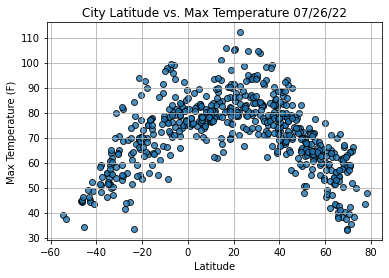

In [15]:
# Import time module 
import time

# Build the scatter plot for lattitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

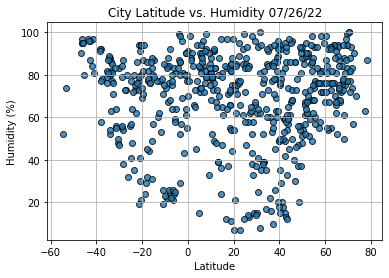

In [16]:
# Import time module 
import time

# Build the scatter plot for lattitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig2.png")

# Show plot.
plt.show()

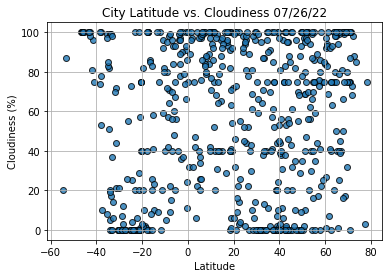

In [17]:
# Import time module 
import time

# Build the scatter plot for lattitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig3.png")

# Show plot.
plt.show()

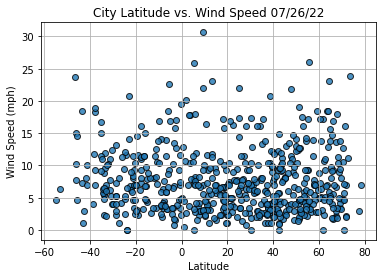

In [18]:
# Import time module 
import time

# Build the scatter plot for lattitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [20]:
index13 = city_data_df.loc[13]
index13

City               Saint-Augustin
Country                        CA
Date          2022-07-26 17:55:37
Lat                        51.226
Lng                      -58.6502
Max Temp                    69.84
Humidity                       61
Cloudiness                     80
Wind Speed                  19.04
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Vanavara,RU,2022-07-26 17:55:34,60.3400,102.2797,59.72,98,27,7.25
7,Cherskiy,RU,2022-07-26 17:55:35,68.7500,161.3000,40.08,75,17,9.04
8,Northam,GB,2022-07-26 17:55:36,51.0333,-4.2167,65.39,57,10,12.35
9,San Patricio,US,2022-07-26 17:55:36,28.0170,-97.5169,94.15,43,81,16.06
11,Ketchikan,US,2022-07-26 17:55:37,55.3422,-131.6461,68.61,76,35,9.26


In [22]:
# Create Northen and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

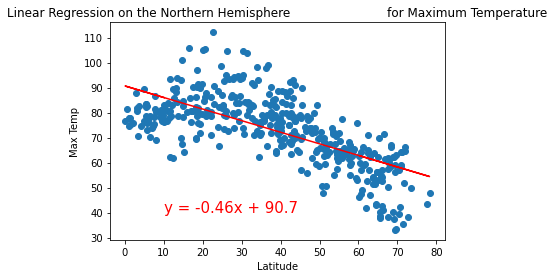

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

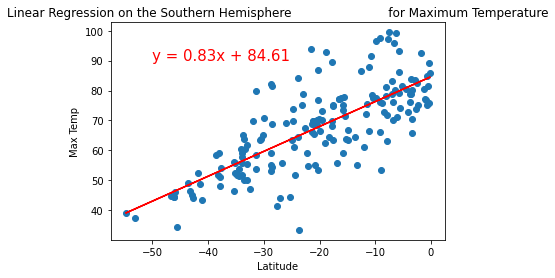

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

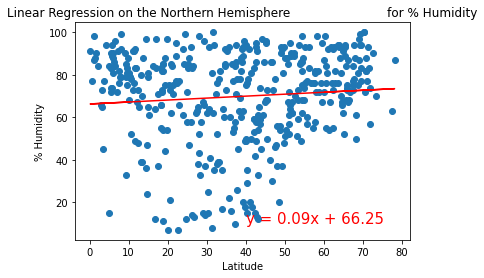

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

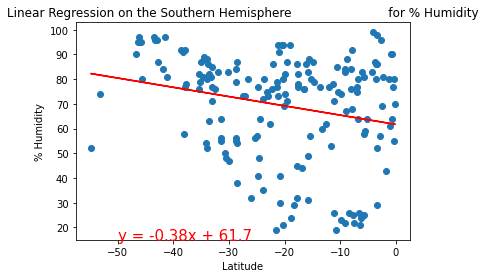

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

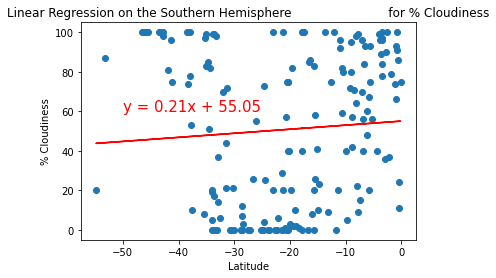

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

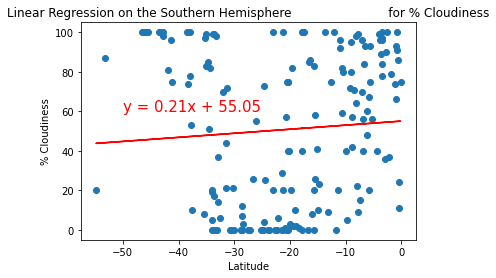

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

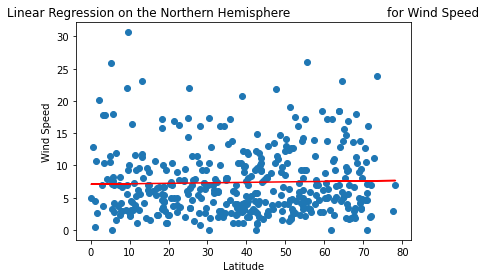

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

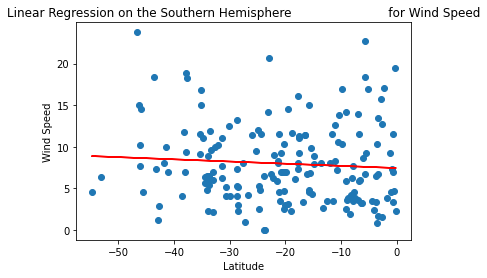

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))